In [3]:
def is_notebook() -> bool:
    try:
        shell = get_ipython().__class__.__name__
        if shell == 'ZMQInteractiveShell':
            return True   # Jupyter notebook or qtconsole
        elif shell == 'TerminalInteractiveShell':
            return False  # Terminal running IPython
        else:
            return False  # Other type (?)
    except NameError:
        return False      # Probably standard Python interpreter    

if is_notebook():
    %load_ext autoreload
    %autoreload 2

import math
import os
import svgwrite
from svgwrite import Drawing
from IPython.display import SVG
from typing import NamedTuple
from enum import Enum
from typing import List

# custom libs
from primitives import *
from arc_drawing import *
from calendar_data import *
from calendar_drawings import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# Get months to draw

scale_factor = SCALE_FACTOR

print(scale_factor)

canvas_width = 11 * scale_factor
width = inchToMilimeter(8 * scale_factor)
outermost_radius = width / ( 2 * 3.14 / 12)
# outermost_radius = inchToMilimeter(35)
inner_radius = outermost_radius * 9.2 / 10
month_thickness = (outermost_radius - inner_radius)
date_box_height = month_thickness * 0.2

# width = outermost_radius * 2 * 3.14 / 12 / 2
width_center = inchToMilimeter(canvas_width) / 2
vertical_offset = 30 * scale_factor

def date_rotation(month: Month) -> int:
    date_angle_offset = -1 * (month.number - 1) * (360 / 12)
    print(f"Offset for {month.name} is {date_angle_offset}")
    return date_angle_offset    

solarMonths = []

for index, month in enumerate(solar_year.months):
    name_upside_down = (index >= 3 and index < 9)
    for day in month.num_days:
        solarMonths.append(
            MonthInstance(
                name=month.name,
                num_days=day,
                color=month.color,
                name_upside_down=name_upside_down,
                date_on_top=False, # the outer month
                date_box_height=date_box_height,
                inner_radius=inner_radius,
                outer_radius=outermost_radius,
                date_angle_offset=date_rotation(month),
            )
        )

    
islamicMonths = []
for month in islamic_year.months:
    name_upside_down = (month.number > 3 and month.number <= 9)
    for day in month.num_days:
        islamicMonths.append(
            MonthInstance(
                name=month.name,
                num_days=day,
                color=month.color,
                name_upside_down=name_upside_down,
                date_on_top=True, # the outer month
                date_box_height=date_box_height,
                inner_radius=inner_radius - month_thickness,
                outer_radius=outermost_radius - month_thickness,
                date_angle_offset=date_rotation(month) + 10, # offset by an extra 10 days. Exact value would be 15 * 360/365, but that's close enough to 15 for this purpose
            )
        ) 

0.8
Offset for January is 0.0
Offset for February is -30.0
Offset for March is -60.0
Offset for April is -90.0
Offset for May is -120.0
Offset for June is -150.0
Offset for July is -180.0
Offset for August is -210.0
Offset for September is -240.0
Offset for October is -270.0
Offset for November is -300.0
Offset for December is -330.0
Offset for Muharram is -210.0
Offset for Safar is -240.0
Offset for Rabi al-Awwal is -270.0
Offset for Rabi at-Thani is -300.0
Offset for Jamad al-Awwal is -330.0
Offset for Jamad at-Thani is 0.0
Offset for Rajab is -30.0
Offset for Shabaan is -60.0
Offset for Ramadan is -90.0
Offset for Shawal is -120.0
Offset for Dhu al-Qadah is -150.0
Offset for Dhu al-Hijja is -180.0


Failed to get connection
** (inkscape:32524): CRITICAL **: 19:07:59.882: dbus_g_proxy_new_for_name: assertion 'connection != NULL' failed

** (inkscape:32524): CRITICAL **: 19:07:59.882: dbus_g_proxy_call: assertion 'DBUS_IS_G_PROXY (proxy)' failed

** (inkscape:32524): CRITICAL **: 19:07:59.882: dbus_g_connection_register_g_object: assertion 'connection != NULL' failed
Failed to get connection
** (inkscape:32558): CRITICAL **: 19:08:00.272: dbus_g_proxy_new_for_name: assertion 'connection != NULL' failed

** (inkscape:32558): CRITICAL **: 19:08:00.272: dbus_g_proxy_call: assertion 'DBUS_IS_G_PROXY (proxy)' failed

** (inkscape:32558): CRITICAL **: 19:08:00.272: dbus_g_connection_register_g_object: assertion 'connection != NULL' failed
Failed to get connection
** (inkscape:32589): CRITICAL **: 19:08:00.617: dbus_g_proxy_new_for_name: assertion 'connection != NULL' failed

** (inkscape:32589): CRITICAL **: 19:08:00.617: dbus_g_proxy_call: assertion 'DBUS_IS_G_PROXY (proxy)' failed

** (

0.8


Failed to get connection
** (inkscape:32718): CRITICAL **: 19:08:02.044: dbus_g_proxy_new_for_name: assertion 'connection != NULL' failed

** (inkscape:32718): CRITICAL **: 19:08:02.044: dbus_g_proxy_call: assertion 'DBUS_IS_G_PROXY (proxy)' failed

** (inkscape:32718): CRITICAL **: 19:08:02.044: dbus_g_connection_register_g_object: assertion 'connection != NULL' failed


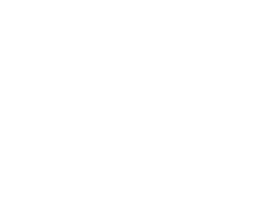

In [5]:
month_offset = 4 * scale_factor

origin_first = Point(width_center, outermost_radius + vertical_offset)
origin = origin_first

days_in_year = 366

def offsetPointBy(point: Point, x_offset: int, y_offset: int):
    return Point(point.x + x_offset, point.y + y_offset)


if scale_factor == 1:
    for i in range(int(len(solarMonths)/2)):
        dwg = getVerticalPageCanvas() # getPageCanvas()

        origin = origin_first
        drawMonthParts(dwg, getMonth(solarMonths[2 * i], days_in_year, origin))
        origin = offsetPointBy(origin, 0, month_offset)
        drawMonthParts(dwg, getMonth(islamicMonths[2 * i], days_in_year, origin))
        
        origin = offsetPointBy(origin, 0, month_thickness*2.5)
        drawMonthParts(dwg, getMonth(solarMonths[2 * i + 1], days_in_year, origin))
        origin = offsetPointBy(origin, 0, month_offset)
        drawMonthParts(dwg, getMonth(islamicMonths[2 * i + 1], days_in_year, origin))

        svg_file = f"out/test_output_{i}.svg"
        pdf_file = f"out/calendar_page_{i}.pdf"

        dwg.saveas(svg_file, pretty=True)
        # os.system(f"convert {svg_file} {pdf_file}")
        os.system(f"inkscape {svg_file} --export-pdf={pdf_file}")

if scale_factor <= 0.5:
    NUM_ROWS = 5
    NUM_COLUMNS = 2
elif scale_factor < 0.75:
    NUM_ROWS = 4
    NUM_COLUMNS = 1
else:
    NUM_ROWS = 2
    NUM_COLUMNS = 1

month_idx = 0
page_num = 0
while month_idx < len(solarMonths) - 1:
    dwg = getVerticalPageCanvas() # getPageCanvas()
    origin = origin_first
    for col_num in range(NUM_COLUMNS):
        for row_num in range(NUM_ROWS):
            month_idx = row_num + NUM_ROWS*col_num + NUM_ROWS * NUM_COLUMNS * page_num

            if month_idx < len(solarMonths):
                drawMonthParts(dwg, getMonth(solarMonths[month_idx], days_in_year, origin))
                origin = offsetPointBy(origin, 0, month_offset)
            
            if month_idx < len(islamicMonths):
                drawMonthParts(dwg, getMonth(islamicMonths[month_idx], days_in_year, origin))
                origin = offsetPointBy(origin, 0, month_thickness*2.3)
        
        # move to next column 
        origin = offsetPointBy(origin_first, width * 1.05, 0)

    svg_file = f"out/svg_{scale_factor}_{page_num}.svg"
    pdf_file = f"out/calendar_page_{scale_factor}_{page_num}.pdf"

    dwg.saveas(svg_file, pretty=True)
    # os.system(f"convert {svg_file} {pdf_file}")
    os.system(f"inkscape {svg_file} --export-pdf={pdf_file}")
    
    page_num += 1

print(scale_factor)
SVG(dwg.tostring())